In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import math

# Box-Muller 

$U, V \sim \mathcal{U} ([0,1])$, then $ X = \sqrt{- 2 \log(U) } \times \cos (2 \pi V) \text{  and  } Y = \sqrt{- 2 \log(U) } \times \sin (2 \pi V) \sim \mathcal{N} (0,1) $

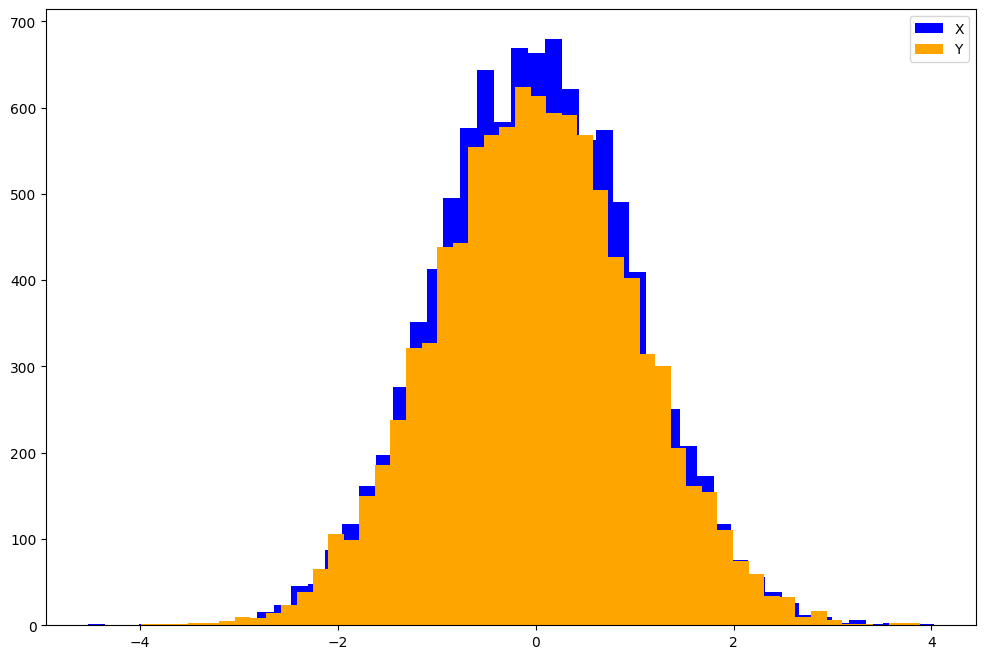

In [3]:
x = []
y = []

U = np.random.uniform(0,1,10000)
V = np.random.uniform(0,1,10000)
X = np.sqrt(-2 * np.log(U)) * np.cos(2 * math.pi * V)
Y = np.sqrt(-2 * np.log(U)) * np.sin(2 * math.pi * V)

plt.figure(figsize=(12,8))
plt.hist(X, bins = 50, color = 'blue', label = 'X')
plt.hist(Y, bins = 50, color = 'orange', label = 'Y')
plt.legend()
plt.show()

# Modified Box-Muller 

$U, V \sim \mathcal{U} ([-1,1])$ 

Then if $ S := U^2 + V^2 \ne 1 $  do : 

- $ X = U \times \sqrt{- 2 \frac{ \log(S) }{S} } \sim \mathcal{N} (0,1) $ and $ Y = V \times \sqrt{- 2 \frac{ \log(S) }{S} }  \sim \mathcal{N} (0,1) $ 

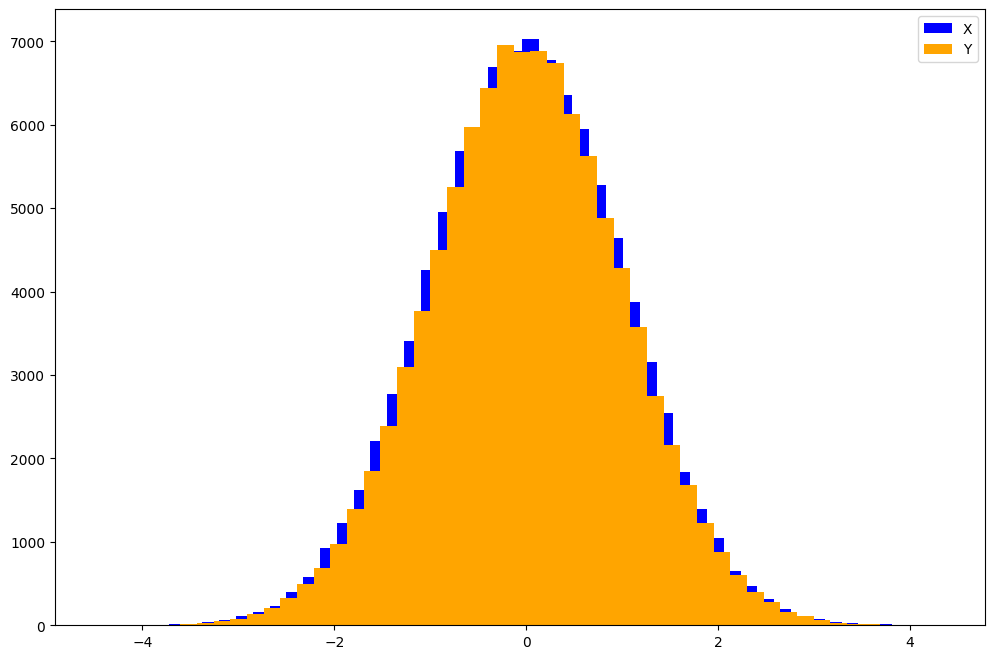

In [6]:
x = []
y = []

for _ in range(100000):
    U1 = np.random.uniform(-1,1)
    U2 = np.random.uniform(-1,1)
    while (U1 ** 2 + U2 ** 2) > 1:
        U1 = np.random.uniform(-1,1)
        U2 = np.random.uniform(-1,1)
    S = (U1 ** 2 + U2 ** 2)
    X = U1 * np.sqrt(-2 * np.log(S) / S)
    Y = U2 * np.sqrt(-2 * np.log(S) / S)
    x.append(X)
    y.append(Y)

plt.figure(figsize=(12,8))
plt.hist(x, bins = 50, color = 'blue', label = 'X')
plt.hist(y, bins = 50, color = 'orange', label = 'Y')
plt.legend()
plt.show()

In [8]:
correlation_coefficient, p_value = pearsonr(x, y)
print(f"Coefficient de corrélation de Pearson : {correlation_coefficient}")
print(f"P-value : {p_value}")

Coefficient de corrélation de Pearson : -0.00020431640213642156
P-value : 0.9484847512905137
